In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('/content/CoronaTweetsSentimentAnalysis.csv')

In [3]:
data.head(20)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive
5,6,44971,NaN,05-03-2020,That's about a week from now. A bit optimistic...,Positive
6,7,44973,Malta,05-03-2020,#CoronaVirus #COVID_19 People are starting to ...,Negative
7,8,44978,"Wayne County, MI",07-03-2020,Alright yall I hope our Melanin prevails but ...,Positive
8,9,44979,"Bondi Beach, Sydney",07-03-2020,When your usual grocery shopping @woolworths t...,Negative
9,10,44980,NaN,07-03-2020,Coronavirus panic spreads: Costco is pulling f...,Negative


In [4]:
data.isnull().sum()

UserName           0
ScreenName         0
Location         452
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

percentage of review types:

Negative    52.36
Positive    47.64
Name: Sentiment, dtype: float64


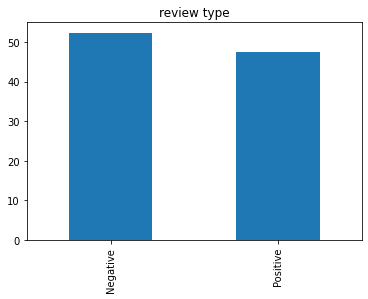

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('percentage of review types:\n')
print(round(data.Sentiment.value_counts(normalize=True)*100,2))
round(data.Sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('review type')
plt.show()

In [6]:
data.drop(['TweetAt','ScreenName','UserName','Location'],axis=1,inplace=True)

In [7]:
data.head(10)

,OriginalTweet,Sentiment
0,When I couldn't find hand sanitizer at Fred Me...,Positive
1,#Panic buying hits #NewYork City as anxious sh...,Negative
2,Voting in the age of #coronavirus = hand sanit...,Positive
3,Best quality couches at unbelievably low price...,Positive
4,While we were busy watching election returns a...,Positive
5,That's about a week from now. A bit optimistic...,Positive
6,#CoronaVirus #COVID_19 People are starting to ...,Negative
7,Alright yall I hope our Melanin prevails but ...,Positive
8,When your usual grocery shopping @woolworths t...,Negative
9,Coronavirus panic spreads: Costco is pulling f...,Negative


In [8]:
data.shape

(1988, 2)

In [9]:
data['OriginalTweet'][572]

'COVID-19 is getting out of hand now, rumours of the government shutting down the entire continent gathering pace &amp; food stock is disappearing from the markets.'

In [10]:
import re
import string

def clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '',text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '',text)
    text=re.sub('\w*\d\w*', '',text)
    return text
cleaned = lambda x: clean(x)

In [11]:
data['description']=pd.DataFrame(data.OriginalTweet.apply(cleaned))

In [12]:
data.sample(10)

,OriginalTweet,Sentiment,description
122,I swung by the grocery store tonight for some ...,Positive,i swung by the grocery store tonight for some ...
502,"#Covid_19 \r\r\nIn Turkey , food prices inc...",Positive,\r\r\nin turkey food prices increased by ...
912,The same people that think Trump could be trus...,Negative,the same people that think trump could be trus...
1146,Working at the grocery store the past couple o...,Negative,working at the grocery store the past couple o...
565,I m so worried for the people in the camps in ...,Negative,i m so worried for the people in the camps in ...
934,It's a 2 hr long lineup to the billing in the ...,Negative,its a hr long lineup to the billing in the de...
1688,COVID-19 will have a long term impact on trave...,Positive,will have a long term impact on travel indust...
805,Assholes buying up toilet paper like it's esse...,Positive,assholes buying up toilet paper like its essen...
644,Canadians are stocking up to take extra care o...,Positive,canadians are stocking up to take extra care o...
1253,Floridas leading grocery store says the move ...,Positive,floridas leading grocery store says the move ...


In [13]:
def clean2(text):
    text = re.sub('[''""...]' , '', text)
    text = re.sub('\n', '', text)
    return text
cleaned2 = lambda x: clean2(x)

In [14]:
data['tweet'] = pd.DataFrame(data.description.apply(cleaned2))

In [15]:
data.head()

,OriginalTweet,Sentiment,description,tweet
0,When I couldn't find hand sanitizer at Fred Me...,Positive,when i couldnt find hand sanitizer at fred mey...,when i couldnt find hand sanitizer at fred mey...
1,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city as anxious shop...,panic buying hits newyork city as anxious shop...
2,Voting in the age of #coronavirus = hand sanit...,Positive,voting in the age of coronavirus hand sanitiz...,voting in the age of coronavirus hand sanitiz...
3,Best quality couches at unbelievably low price...,Positive,best quality couches at unbelievably low price...,best quality couches at unbelievably low price...
4,While we were busy watching election returns a...,Positive,while we were busy watching election returns a...,while we were busy watching election returns a...


In [16]:
data.drop(['description'],axis=1,inplace=True)

In [17]:
data['result'] = pd.factorize(data.Sentiment)[0]

In [18]:
data.result.describe()

count    1988.000000
mean        0.523642
std         0.499566
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: result, dtype: float64

In [19]:
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [20]:
corpus = []
for i in range (0,len(data.tweet)):
    Description = re.sub('[^a-zA-Z]'," ",data["tweet"][i])
    Description = Description.lower()
    Description = Description.split()
    pe=PorterStemmer()
    all_stopword=stopwords.words('english')
    type (all_stopword)
    all_stopword.remove("not")
    Description = [pe.stem(word) for word in Description if not word in set (all_stopword)]
    Description=" ".join(Description)
    corpus.append(Description)

In [21]:
np.array(corpus).shape

(1988,)

In [22]:
from sklearn.model_selection import train_test_split

x = data.tweet
y = data.result

xtrain,xtest,ytrain,ytest = train_test_split(corpus,y,test_size=0.2)

print('xtrain :',len(xtrain))
print('xtest :',len(xtest))
print('ytrain :',len(ytrain))
print('ytest :',len(ytest))

xtrain : 1590
xtest : 398
ytrain : 1590
ytest : 398


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec=TfidfVectorizer()
clf=LogisticRegression(solver="newton-cg",penalty = "l2")

from sklearn.pipeline import Pipeline

In [24]:
model= Pipeline([('vectorizer',tvec),('classifier',clf)])

model.fit(xtrain,ytrain)

from sklearn.metrics import confusion_matrix

predictions = model.predict(xtest)
confusion_matrix(predictions,ytest)


array([[112,  64],
       [ 73, 149]])

In [25]:
model.score(xtrain,ytrain)

0.9176100628930818

In [26]:
from sklearn.metrics import accuracy_score

print("Accuracy : " , accuracy_score(predictions,ytest))

Accuracy :  0.6557788944723618


In [30]:
example=["corona is a disaster it made our lives bad"]
result=model.predict(example)
if(result==0):
  print("Positive")
else:
  print("Negative")

Negative


In [31]:
from sklearn.ensemble import RandomForestClassifier

tvec2=TfidfVectorizer()
RF=RandomForestClassifier()

In [32]:
model2= Pipeline([('vectorizer',tvec2),('classifier',RF)])

model2.fit(xtrain,ytrain)


predictions = model2.predict(xtest)
confusion_matrix(predictions,ytest)

array([[ 99,  61],
       [ 86, 152]])

In [33]:
model2.score(xtrain,ytrain)

1.0